# Fundamentos de Estadística y Análisis de Datos con Python

In [66]:
import numpy as np
import datetime
from datetime import datetime
from scipy.stats import bernoulli
from scipy.stats import binom
import scipy
import scipy.stats
import pandas as pd

In [4]:
universo = ['cara', 'sello']
p_cara = 1/2

In [5]:
universo[bernoulli.rvs(p=p_cara)]

'cara'

In [6]:
bernoulli.rvs(p=p_cara, size = 10)
sum(bernoulli.rvs(p=p_cara, size = 10))

# Distribucion binomial: es la suma de n experimentos independientes de bernoulli

8

In [7]:
binom.rvs(p=p_cara, n = 10, size = 100)
# En la distribucion de probabilidad veremos que hay unos valores que tienen mayor probabilidad de presentarse que otros dentro de la distribucion


array([6, 7, 2, 2, 4, 4, 7, 7, 2, 6, 4, 4, 2, 6, 5, 4, 4, 5, 4, 5, 5, 4,
       5, 5, 4, 7, 3, 3, 5, 5, 4, 3, 6, 6, 7, 4, 4, 5, 6, 5, 7, 4, 4, 6,
       4, 6, 5, 6, 5, 4, 5, 9, 5, 5, 5, 5, 9, 4, 6, 5, 4, 6, 4, 8, 5, 6,
       3, 3, 3, 4, 7, 7, 9, 5, 6, 5, 2, 6, 1, 4, 4, 4, 3, 6, 6, 4, 6, 3,
       3, 6, 6, 4, 5, 4, 6, 5, 5, 5, 6, 8])

In [8]:
pd.Series(binom.rvs(p=p_cara, n = 10, size = 100)).value_counts()/100

6    0.21
4    0.20
7    0.19
5    0.18
3    0.08
8    0.05
2    0.04
1    0.04
9    0.01
dtype: float64

## Medidas de Tendencia Central

In [10]:
df = pd.read_csv('bicicletas-compartidas.csv')
df.columns

Index(['fecha', 'bicis-compartidas', 'temp-obs', 'sens-temp', 'hum', 'viento',
       'codigo-clima', 'festivo', 'findesemana', 'cuartil-ano'],
      dtype='object')

In [11]:
y = df['bicis-compartidas'].values
y = np.where(y == 0, 1, y)

In [12]:
np.min(y)

1

In [13]:
np.max(y)

7860

In [14]:
# promedio: sum(yi)/n
np.mean(y)

1143.1016997817849

In [15]:
np.sum(y)/len(y)

1143.1016997817849

In [16]:
#media geometrica
scipy.stats.mstats.hmean(y)

241.65180305136826

In [17]:
#mediana
np.median(y)

844.0

In [18]:
#moda
moda = np.nan
valores, conteo_valores = np.unique(y, return_counts = True)
pos = np.argmax(conteo_valores)
moda = valores[pos]
moda

46

### Desviacion Estandar
Que tanto se alejan cada uno de los valores de su valor promedio

In [19]:
np.std(y)

1085.0768508213835

Revisiones

In [20]:
y_alterado = y.copy()
y_alterado[ y_alterado == max(y_alterado)] = 100000

In [21]:
print(np.mean(y))
print(np.mean(y_alterado))

1143.1016997817849
1148.392844837487


In [22]:
print(np.median(y))
print(np.median(y_alterado))

844.0
844.0


## Diagramas de frecuencias para variables continuas y discretas

In [23]:
df.columns

Index(['fecha', 'bicis-compartidas', 'temp-obs', 'sens-temp', 'hum', 'viento',
       'codigo-clima', 'festivo', 'findesemana', 'cuartil-ano'],
      dtype='object')

In [24]:
# Frcuencias categoricas
ycat = df['cuartil-ano']
ycat = ycat.apply(lambda x: 'Cat-' + str(int(x)))
ycat.head()

0    Cat-3
1    Cat-3
2    Cat-3
3    Cat-3
4    Cat-3
Name: cuartil-ano, dtype: object

In [25]:
valores, conteo_freq = np.unique(ycat, return_counts = True)
valores, conteo_freq

tabla_frecuencias = dict( zip(valores, conteo_freq))
tabla_frecuencias

{'Cat-0': 4394, 'Cat-1': 4387, 'Cat-2': 4303, 'Cat-3': 4330}

In [26]:
# variable numerica

ynum = df['viento'].copy()
np.min(ynum), np.max(ynum)

(0.0, 56.5)

In [27]:
np.percentile(ynum, q=100)

56.5

In [28]:
np.percentile(ynum, q=0)

0.0

In [29]:
np.percentile(ynum, q=50)

15.0

In [30]:
np.median(ynum)

15.0

In [31]:
# Cuartiles
valores = [0, 25, 50, 75, 100]
np.percentile(ynum, q = valores)

array([ 0. , 10. , 15. , 20.5, 56.5])

In [32]:
# Quintiles
valores = [0, 20, 40, 60, 80, 100]
np.percentile(ynum, q = valores)

array([ 0. ,  9. , 13. , 17. , 22. , 56.5])

In [33]:
# Deciles
valores = list(range(0,110,10))
np.percentile(ynum, q = valores)

array([ 0. ,  6.5,  9. , 11. , 13. , 15. , 17. , 19.5, 22. , 27. , 56.5])

In [34]:
y = df['bicis-compartidas']
y.describe()

count    17414.000000
mean      1143.101642
std       1085.108068
min          0.000000
25%        257.000000
50%        844.000000
75%       1671.750000
max       7860.000000
Name: bicis-compartidas, dtype: float64

In [35]:
# valores atipicos (outliers)

Q1 = np.percentile(ynum, q = 25)
Q3 = np.percentile(ynum, q = 75)

#Rango intercuartilico

RI = Q3 - Q1

#limites del rango intercuartilico
lim_inf = Q1 - 1.5*RI
lim_sup = Q3 + 1.5*RI

[lim_inf, lim_sup]

[-5.75, 36.25]

### Histogramas

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

(array([8.274e+03, 4.416e+03, 2.355e+03, 1.241e+03, 5.610e+02, 4.710e+02,
        8.800e+01, 2.000e+00, 3.000e+00, 3.000e+00]),
 array([   0.,  786., 1572., 2358., 3144., 3930., 4716., 5502., 6288.,
        7074., 7860.]),
 <a list of 10 Patch objects>)

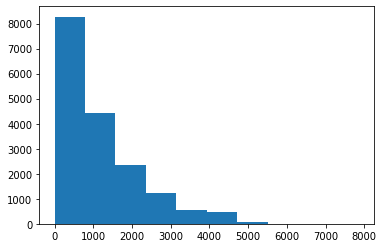

In [37]:
plt.hist(y)

Variables Categoricas

In [38]:
df. columns

Index(['fecha', 'bicis-compartidas', 'temp-obs', 'sens-temp', 'hum', 'viento',
       'codigo-clima', 'festivo', 'findesemana', 'cuartil-ano'],
      dtype='object')

In [39]:
y = df['cuartil-ano'].apply(lambda x: 'cuartil' + str(int(x)))

Text(0, 0.5, 'Frecuencia')

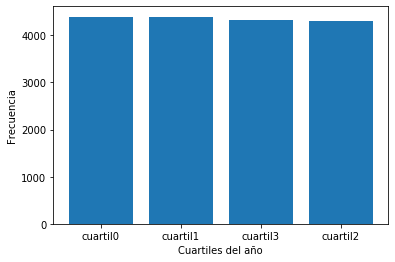

In [41]:
fig, ax = plt.subplots()
ax.bar(y.value_counts().index, y.value_counts())
ax.set_xlabel('Cuartiles del año')
ax.set_ylabel('Frecuencia')

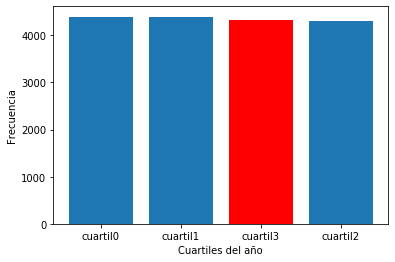

In [43]:
fig, ax = plt.subplots()
ax.bar(y.value_counts().index, y.value_counts())
ax.set_xlabel('Cuartiles del año')
ax.set_ylabel('Frecuencia')
ax.patches[2].set_facecolor('red')

Text(0.5, 1.0, 'Diagrama de Pie')

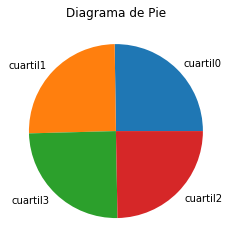

In [45]:
fig, ax = plt.subplots()
ax.pie(y.value_counts(), labels = y.value_counts().index)
ax.set_title('Diagrama de Pie')

In [46]:
y = df['viento']

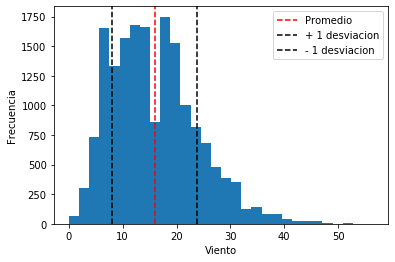

In [52]:
fig, ax = plt.subplots()
ax.hist(y, bins = 30)
ax.set_xlabel('Viento')
ax.set_ylabel('Frecuencia')
plt.axvline(np.mean(y), c = 'r', linestyle = '--', label = 'Promedio')
plt.axvline(np.mean(y) + np.std(y), c = 'k', linestyle = '--', label = '+ 1 desviacion')
plt.axvline(np.mean(y) - np.std(y), c = 'k', linestyle = '--', label = '- 1 desviacion')
ax.legend()

## Boxplots y Scatterplots
Visualización grafica de los cuartiles

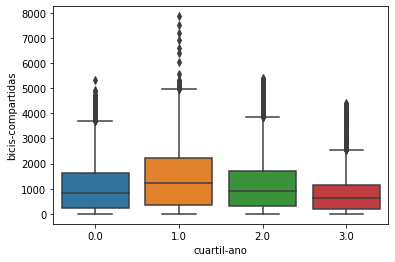

In [57]:
fig, ax = plt.subplots()
sns.boxplot(x = 'cuartil-ano', y = 'bicis-compartidas', data = df)

Text(0, 0.5, 'Bicis-Compartidas')

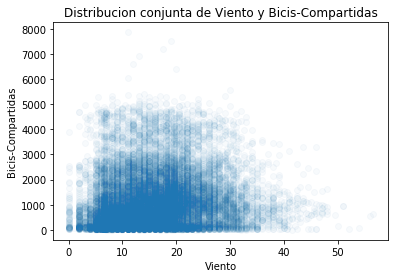

In [65]:
fig, ax = plt.subplots()
ax.scatter(df['viento'], df['bicis-compartidas'], alpha = 0.03)
ax.set_title('Distribucion conjunta de Viento y Bicis-Compartidas')
ax.set_xlabel('Viento')
ax.set_ylabel('Bicis-Compartidas')

# Conceptos de Probabilidad a Eventos Aleatorios

## Teorema de Bayes

In [67]:
df = pd.read_csv('juego-azar.csv', sep = ';')
df.columns

Index(['bola', 'color', 'numero'], dtype='object')

In [76]:
# Probabilidades UNivariadas

df.numero.value_counts()/len(df)

1    0.4
3    0.3
2    0.3
Name: numero, dtype: float64

In [69]:
df.color.value_counts()/len(df)

negro     0.6
blanco    0.4
Name: color, dtype: float64

In [74]:
df.groupby(['numero', 'color']).size()

numero  color 
1       blanco    1
        negro     3
2       blanco    1
        negro     2
3       blanco    2
        negro     1
dtype: int64

In [72]:
# Probabilidad condicional: P(A|B) = P(B|2) = 1/3 (las esferas que estan marcadas con el numero 2)
1/3

0.3333333333333333

La utilidad del T. de Bayes es poder derivar análisis, sobre A (que es un evenbto particular)
cuando no conocemos sus probabilidades individuales univariadas pero si tenemos información 
del evento condicionado P(A|B) y algunas otras probabilidades asociadas a P(B)
P(A)

p_blanca = 4/10
p(p_blanca|1) + p(p_blanca|2) + p(p_blanca|3)

1 + 1 + 2

p(blanco) = p(p_blanca|1)p(1) + p(p_blanca|2)p(2) + p(p_blanca|3)p(3)

p(blanco) = (1/4)(4/10) + (1/3)(3/10) + (2/3)(3/10)

In [78]:
(1/4)*(4/10) + (1/3)*(3/10) + (2/3)*(3/10)

0.4

## Funciones de Distribución Discreta y Continua

1.0000000000000002

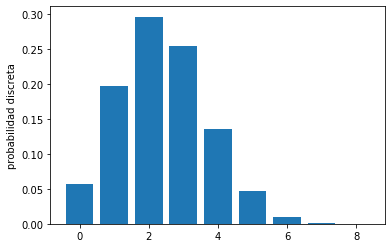

In [81]:
p = 0.3
n = 8
x = list(range(0, 9, 1))
y = list([])

for i in x:
    y.append(binom.pmf(i, p = p, n = n))

fig, ax = plt.subplots()
ax.bar(x,y)
ax.set_ylabel('probabilidad discreta')

np.sum(y)

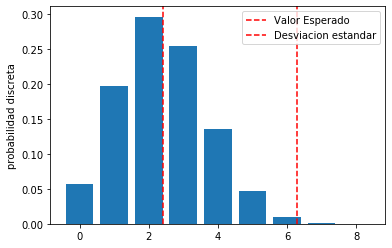

In [85]:
media = np.average(x, weights = y)

varianza = np.average( ((x - media)**2), weights = y )

media, varianza

fig, ax = plt.subplots()
ax.bar(x,y)
ax.set_ylabel('probabilidad discreta')
ax.axvline( x = media, c = 'r', linestyle = '--', label = 'Valor Esperado')
ax.axvline( x = media + 3*np.sqrt(varianza), c = 'r', linestyle = '--', label = 'Desviacion estandar')
ax.legend()

In [90]:
N = 100

x = list(range(0, N + 1, 1))
y = list([])

for i in x :
    y.append(binom.pmf(i, p = 0.3, n = N))
    

Text(0.5, 1.0, 'probabilidad continua')

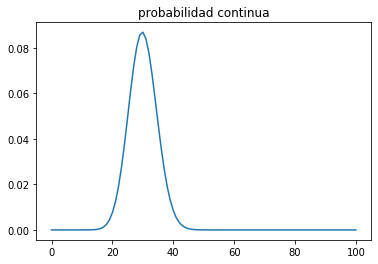

In [88]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('probabilidad continua')

Text(0.5, 1.0, 'probabilidad continua acomulada')

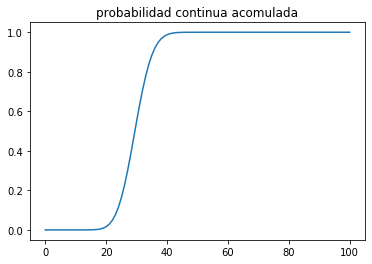

In [92]:
N = 100

x = list(range(0, N + 1, 1))
y = list([])

for i in x :
    y.append(binom.cdf(i, p = 0.3, n = N))
    
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('probabilidad continua acomulada')

In [95]:
# Vamos a calcular la medai, la varianza, la asimetria y curtosis:
from scipy.stats import norm
mean, var, skew, kurt = norm.stats(moments = 'mvsk')
mean
var

array(1.)

### Bernoulli

In [98]:
p = 0.3
data = bernoulli.rvs(p, size = 100)
len(data)

100

In [99]:
mean, var, skew, kurt = bernoulli.stats(p, moments = 'mvsk')
mean, var, skew, kurt

(array(0.3), array(0.21), array(0.87287156), array(-1.23809524))

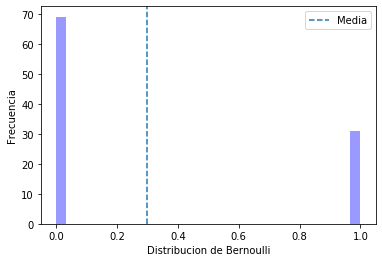

In [102]:
ax = sns.distplot(data, bins = 30, kde = False, color = 'blue')
ax.set(xlabel = 'Distribucion de Bernoulli', ylabel = 'Frecuencia')
ax.axvline(x = mean, linestyle = '--', label = 'Media')
ax.legend()

### Distribucion Binomial

In [103]:
p = 0.3
n = 10
data = binom.rvs(p = p, n = n, size = 100)
len(data)

100

In [104]:
mean, var, skew, kurt = binom.stats(p = p, n = n, moments = 'mvsk')
mean, var, skew, kurt

(array(3.), array(2.1), array(0.27602622), array(-0.12380952))

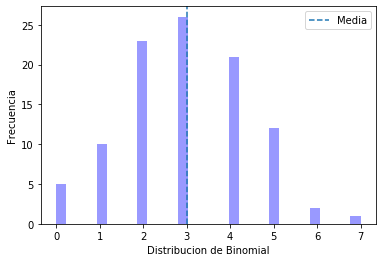

In [106]:
ax = sns.distplot(data, bins = 30, kde = False, color = 'blue')
ax.set(xlabel = 'Distribucion de Binomial', ylabel = 'Frecuencia')
ax.axvline(x = mean, linestyle = '--', label = 'Media')
ax.legend()

### Distribucion Geometrica

In [112]:
from scipy.stats import nbinom
p = 0.3
n = 10
data = nbinom.rvs(p = p, n = n, size = 100)
len(data)

100

In [113]:
mean, var, skew, kurt = nbinom.stats(p = p, n = n, moments = 'mvsk')
mean, var, skew, kurt

(array(23.33333333), array(77.77777778), array(0.6425396), array(0.61285714))

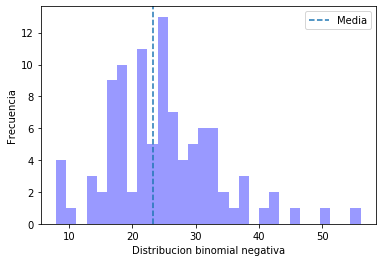

In [115]:
ax = sns.distplot(data, bins = 30, kde = False, color = 'blue')
ax.set(xlabel = 'Distribucion binomial negativa', ylabel = 'Frecuencia')
ax.axvline(x = mean, linestyle = '--', label = 'Media')
ax.legend()

### Distribución de Poisson

In [121]:
from scipy.stats import poisson
lambda_p = 100

data = poisson.rvs(mu = lambda_p, size = 100)
len(data)

100

In [122]:
mean, var, skew, kurt = poisson.stats(mu = lambda_p, moments = 'mvsk')
mean, var, skew, kurt

(array(100.), array(100.), array(0.1), array(0.01))

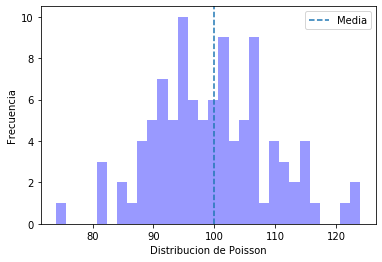

In [123]:
ax = sns.distplot(data, bins = 30, kde = False, color = 'blue')
ax.set(xlabel = 'Distribucion de Poisson', ylabel = 'Frecuencia')
ax.axvline(x = mean, linestyle = '--', label = 'Media')
ax.legend()

### Distribución Exponencial

In [124]:
from scipy.stats import expon
data = expon.rvs(size = 100000000)
len(data)

100000000

In [125]:
mean, var, skew, kurt = expon.stats(moments = 'mvsk')
mean, var, skew, kurt

(array(1.), array(1.), array(2.), array(6.))

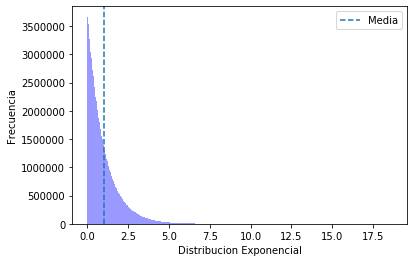

In [126]:
ax = sns.distplot(data, bins = 500, kde = False, color = 'blue')
ax.set(xlabel = 'Distribucion Exponencial', ylabel = 'Frecuencia')
ax.axvline(x = mean, linestyle = '--', label = 'Media')
ax.legend()

## Distribucion Normal

In [127]:
from scipy.stats import norm
mean = 0
var = 1
data = norm.rvs(size = 100000000)
len(data)

100000000

In [128]:
mean, var, skew, kurt = norm.stats(moments = 'mvsk')
mean, var, skew, kurt

(array(0.), array(1.), array(0.), array(0.))

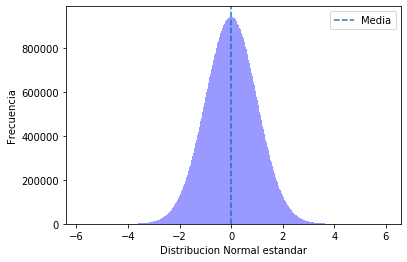

In [129]:
ax = sns.distplot(data, bins = 500, kde = False, color = 'blue')
ax.set(xlabel = 'Distribucion Normal estandar', ylabel = 'Frecuencia')
ax.axvline(x = mean, linestyle = '--', label = 'Media')
ax.legend()

## Distribucion Uniforme

In [130]:
from scipy.stats import uniform
data = uniform.rvs(size = 100000000)
len(data)

100000000

In [131]:
mean, var, skew, kurt = uniform.stats(moments = 'mvsk')
mean, var, skew, kurt

(array(0.5), array(0.08333333), array(0.), array(-1.2))

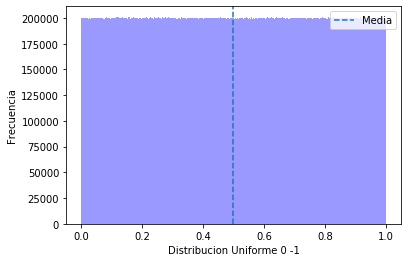

In [133]:
ax = sns.distplot(data, bins = 500, kde = False, color = 'blue')
ax.set(xlabel = 'Distribucion Uniforme 0 -1', ylabel = 'Frecuencia')
ax.axvline(x = mean, linestyle = '--', label = 'Media')
ax.legend()